In [3]:
#load packages
import xarray as xr
import pickle
from scipy import stats
from scipy import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cbook as cbook
import warnings
warnings.simplefilter("ignore") 

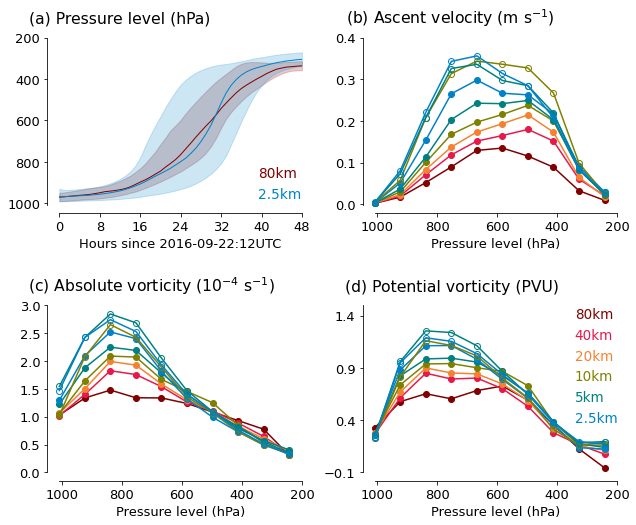

In [5]:
#defining color dictionaries for plotting lines
def colordictionary():
    # manually defined colors
    mymaroon= np.array([128,   0,   0])/255
    myred   = np.array([230,  25,  75])/255
    myorange= np.array([245, 130,  48])/255
    mymagenta=np.array([240, 50, 230 ])/255
    myolive = np.array([128, 128,   0])/255
    myteal  = np.array([  0, 128, 128])/255
    myblue  = np.array([  0, 130, 200])/255
    mynavy  = np.array([  0,   0, 128])/255

    return {'80km': mymaroon, '40km': myred, '20km': myorange, '10km': myolive, '5km': myteal, '2km': myblue}
colors=colordictionary()

##loading trajectories with traced pressure-level value

ds1=xr.open_dataset('/work/bb1018/b380723/0.8/1m/outtrace3.nc')
ds2=xr.open_dataset('/work/bb1018/b380723/0.4/1m/outtrace3.nc')
ds3=xr.open_dataset('/work/bb1018/b380723/0.2/1m/outtrace3.nc')
ds4=xr.open_dataset('/work/bb1018/b380723/0.1convon/1m/outtrace3.nc')
ds5=xr.open_dataset('/work/bb1018/b380723/0.05convon/1m/outtrace3.nc')
ds6=xr.open_dataset('/work/bb1018/b380723/0.025convon/1m/outtrace3.nc')
ds7=xr.open_dataset('/work/bb1018/b380723/0.1convoff/1m/outtrace3.nc')
ds8=xr.open_dataset('/work/bb1018/b380723/0.05convoff/1m/outtrace3.nc')
ds9=xr.open_dataset('/work/bb1018/b380723/0.025convoff/1m/outtrace3.nc')


alltraj= (ds1["P"], ds2["P"], ds3["P"], ds4["P"], ds5["P"], ds6["P"], ds7["P"], ds8["P"], ds9["P"])


a1=np.nanpercentile(alltraj[0], 25,axis=1)
a2=np.nanpercentile(alltraj[0], 50,axis=1)
a3=np.nanpercentile(alltraj[0], 75,axis=1)

b1=np.nanpercentile(alltraj[1], 25,axis=1)
b2=np.nanpercentile(alltraj[1], 50,axis=1)
b3=np.nanpercentile(alltraj[1], 75,axis=1)

c1=np.nanpercentile(alltraj[2], 25,axis=1)
c2=np.nanpercentile(alltraj[2], 50,axis=1)
c3=np.nanpercentile(alltraj[2], 75,axis=1)

d1=np.nanpercentile(alltraj[3], 25,axis=1)
d2=np.nanpercentile(alltraj[3], 50,axis=1)
d3=np.nanpercentile(alltraj[3], 75,axis=1)

e1=np.nanpercentile(alltraj[4], 25,axis=1)
e2=np.nanpercentile(alltraj[4], 50,axis=1)
e3=np.nanpercentile(alltraj[4], 75,axis=1)

f1=np.nanpercentile(alltraj[5], 25,axis=1)
f2=np.nanpercentile(alltraj[5], 50,axis=1)
f3=np.nanpercentile(alltraj[5], 75,axis=1)

g1=np.nanpercentile(alltraj[6], 25,axis=1)
g2=np.nanpercentile(alltraj[6], 50,axis=1)
g3=np.nanpercentile(alltraj[6], 75,axis=1)

h1=np.nanpercentile(alltraj[7], 25,axis=1)
h2=np.nanpercentile(alltraj[7], 50,axis=1)
h3=np.nanpercentile(alltraj[7], 75,axis=1)

i1=np.nanpercentile(alltraj[8], 25,axis=1)
i2=np.nanpercentile(alltraj[8], 50,axis=1)
i3=np.nanpercentile(alltraj[8], 75,axis=1)

###########################################

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 13})
plt.subplots_adjust(hspace = 0.6, wspace=0.3)

ax= plt.subplot(221)

ax.plot(alltraj[0].ntim,a2, linewidth=1, label='80km', color=colors['80km'])
ax.fill_between(alltraj[0].ntim,a3,a1,color=colors['80km'],alpha=0.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(alltraj[0].ntim,f2, linewidth=1, label='2.5km', color=colors['2km'])
ax.fill_between(alltraj[0].ntim,f3,f1,color=colors['2km'],alpha=0.2)

plt.xlabel("Hours since 2016-09-22:12UTC")

plt.xticks(np.arange(0,49,8))
plt.xlim(0,48); plt.ylim(200,1007.5)
plt.gca().invert_yaxis()
plt.xticks(np.arange(0,49,8))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')

leg = plt.legend(loc='lower right', bbox_to_anchor=(1.05,-0.05), fontsize=13.7, handlelength=0, markerscale=0, frameon=False)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
    
plt.title('(a) Pressure level (hPa)',x=0.25, y=1.05)

###########################################ascent velocity###############################################
##loading file containing traced ascent velocity binned over pressure-level

with open("/work/bb1018/b380723/figures/w_1m/newcal/binmeanalltraj.pkl","rb") as f:
    binmeanalltraj = pickle.load(f)

a2=np.nanmean(binmeanalltraj[0][1], axis=1)
b2=np.nanmean(binmeanalltraj[1][1], axis=1)
c2=np.nanmean(binmeanalltraj[2][1], axis=1)
d2=np.nanmean(binmeanalltraj[3][1], axis=1)
e2=np.nanmean(binmeanalltraj[4][1], axis=1)
f2=np.nanmean(binmeanalltraj[5][1], axis=1)
g2=np.nanmean(binmeanalltraj[6][1], axis=1)
h2=np.nanmean(binmeanalltraj[7][1], axis=1)
i2=np.nanmean(binmeanalltraj[8][1], axis=1)


ax=plt.subplot(222)

ax.plot(binmeanalltraj[0][0],a2, marker='o',color=colors['80km'],label='80km',clip_on=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(binmeanalltraj[1][0],b2, marker='o',color=colors['40km'],label='40km',clip_on=False)
ax.plot(binmeanalltraj[2][0],c2, marker='o',color=colors['20km'],label='20km',clip_on=False)
ax.plot(binmeanalltraj[3][0],d2, marker='o',color=colors['10km'],label='10km',clip_on=False)
ax.plot(binmeanalltraj[4][0],e2, marker='o',color=colors['5km'],label='5km',clip_on=False)
ax.plot(binmeanalltraj[5][0],f2, marker='o',color=colors['2km'],label='2.5km',clip_on=False)
ax.plot(binmeanalltraj[6][0],g2, marker='o',markerfacecolor='None',color=colors['10km'],clip_on=False)
ax.plot(binmeanalltraj[7][0],h2, marker='o',markerfacecolor='None',color=colors['5km'],clip_on=False)
ax.plot(binmeanalltraj[8][0],i2, marker='o',markerfacecolor='None',color=colors['2km'],clip_on=False)


plt.xlim(200,1007.5); plt.ylim(-0.001,0.4)
plt.gca().invert_xaxis()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')

plt.title('(b) Ascent velocity (m s$^{-1}$)', x=0.31, y=1.05)
plt.xlabel("Pressure level (hPa)")


#################################################absolute vorticity##########################################
with open("/work/bb1018/b380723/figures/av_1m/newcal/binmeanalltraj.pkl","rb") as f:
    binmeanalltraj = pickle.load(f)

a2=np.nanmean(binmeanalltraj[0][1], axis=1)
b2=np.nanmean(binmeanalltraj[1][1], axis=1)
c2=np.nanmean(binmeanalltraj[2][1], axis=1)
d2=np.nanmean(binmeanalltraj[3][1], axis=1)
e2=np.nanmean(binmeanalltraj[4][1], axis=1)
f2=np.nanmean(binmeanalltraj[5][1], axis=1)
g2=np.nanmean(binmeanalltraj[6][1], axis=1)
h2=np.nanmean(binmeanalltraj[7][1], axis=1)
i2=np.nanmean(binmeanalltraj[8][1], axis=1)


ax=plt.subplot(223)

ax.plot(binmeanalltraj[0][0],a2, marker='o',color=colors['80km'],label='80km',clip_on=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(binmeanalltraj[1][0],b2, marker='o',color=colors['40km'],label='40km',clip_on=False)
ax.plot(binmeanalltraj[2][0],c2, marker='o',color=colors['20km'],label='20km',clip_on=False)
ax.plot(binmeanalltraj[3][0],d2, marker='o',color=colors['10km'],label='10km',clip_on=False)
ax.plot(binmeanalltraj[4][0],e2, marker='o',color=colors['5km'],label='5km',clip_on=False)
ax.plot(binmeanalltraj[5][0],f2, marker='o',color=colors['2km'],label='2.5km',clip_on=False)
ax.plot(binmeanalltraj[6][0],g2, marker='o',markerfacecolor='None',color=colors['10km'],clip_on=False)
ax.plot(binmeanalltraj[7][0],h2, marker='o',markerfacecolor='None',color=colors['5km'],clip_on=False)
ax.plot(binmeanalltraj[8][0],i2, marker='o',markerfacecolor='None',color=colors['2km'],clip_on=False)

plt.xlim(200,1007.5); plt.ylim(0,3)
plt.gca().invert_xaxis()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')

plt.title('(c) Absolute vorticity (10$^{-4}$ s$^{-1}$)', x=0.38, y=1.05)

plt.xlabel("Pressure level (hPa)")

################################################potential vorticity################################################
with open("/work/bb1018/b380723/figures/pv_1m/newcal/binmeanalltraj.pkl","rb") as f:
    binmeanalltraj = pickle.load(f)

a2=np.nanmean(binmeanalltraj[0][1], axis=1)
b2=np.nanmean(binmeanalltraj[1][1], axis=1)
c2=np.nanmean(binmeanalltraj[2][1], axis=1)
d2=np.nanmean(binmeanalltraj[3][1], axis=1)
e2=np.nanmean(binmeanalltraj[4][1], axis=1)
f2=np.nanmean(binmeanalltraj[5][1], axis=1)
g2=np.nanmean(binmeanalltraj[6][1], axis=1)
h2=np.nanmean(binmeanalltraj[7][1], axis=1)
i2=np.nanmean(binmeanalltraj[8][1], axis=1)


ax=plt.subplot(224)

ax.plot(binmeanalltraj[0][0],a2, marker='o',color=colors['80km'],label='80km',clip_on=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(binmeanalltraj[1][0],b2, marker='o',color=colors['40km'],label='40km',clip_on=False)
ax.plot(binmeanalltraj[2][0],c2, marker='o',color=colors['20km'],label='20km',clip_on=False)
ax.plot(binmeanalltraj[3][0],d2, marker='o',color=colors['10km'],label='10km',clip_on=False)
ax.plot(binmeanalltraj[4][0],e2, marker='o',color=colors['5km'],label='5km',clip_on=False)
ax.plot(binmeanalltraj[5][0],f2, marker='o',color=colors['2km'],label='2.5km',clip_on=False)
ax.plot(binmeanalltraj[6][0],g2, marker='o',markerfacecolor='None',color=colors['10km'],clip_on=False)
ax.plot(binmeanalltraj[7][0],h2, marker='o',markerfacecolor='None',color=colors['5km'],clip_on=False)
ax.plot(binmeanalltraj[8][0],i2, marker='o',markerfacecolor='None',color=colors['2km'],clip_on=False)

plt.xlim(200,1007.5); plt.ylim(-0.1,1.5)
plt.yticks(np.arange(-0.1,1.51,0.5))
plt.gca().invert_xaxis()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')

plt.title('(d) Potential vorticity (PVU)', x=0.32, y=1.05)

plt.xlabel("Pressure level (hPa)")

leg = plt.legend(loc='lower right', bbox_to_anchor=(1.05,0.21), fontsize=13.5, handlelength=0, markerscale=0, frameon=False)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
